/usr/local/lib/python3.8/dist-packages/qiskit_nature/problems/second_quantization/electronic/electronic_structure_problem.py:93: ListAuxOpsDeprecationWarning: List-based `aux_operators` are deprecated as of version 0.3.0 and support for them will be removed no sooner than 3 months after the release. Instead, use dict-based `aux_operators`. You can switch to the dict-based interface immediately, by setting `qiskit_nature.settings.dict_aux_operators` to `True`.
  second_quantized_ops = self._grouped_property_transformed.second_q_ops()


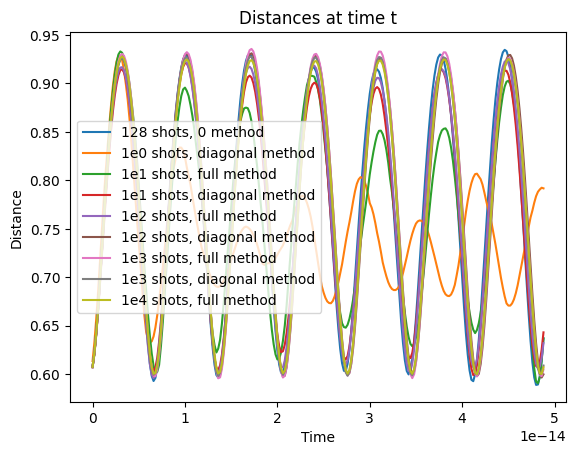

In [1]:
from euler_intergrator_1D import main
from matplotlib import pyplot as plt
import numpy as np

#modes are 'diagonal' (matrix only has variances), 'full' (covariances also) and '0' (covariances and variances are zero - langevin goes to verlet)


shots = np.logspace(1,4,4)
#print(shots)
distance_array = []
(times,distances) = main(128,mode = '0')
distance_array.append(distances)
#print(distances)
for i in range(len(shots)):

    (times,distances) = main(shots[i],mode = 'diagonal')
    distance_array.append(distances)
    (times,distances) = main(shots[i],mode = 'full')
    distance_array.append(distances)
    #print(distances)

for i in range(len(distance_array)):

    if(i == 0):
        plt.plot(times,distance_array[i], label = '128 shots, 0 method')
    elif(i%2 == 0):
        plt.plot(times,distance_array[i], label = '1e'+str(int(i/2)) + ' shots, full method')
    else:
        plt.plot(times,distance_array[i], label = '1e'+str(int(i/2)) + ' shots, diagonal method')




#plt.plot(times,force_exact, label = 'Exact')
plt.title('Distances at time t')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.legend()
plt.show()